Test ML ORES article "Härnösand" 

In [24]:
%matplotlib notebook
import csv
import json
import time
import sys

import requests
import mwapi
import mwtypes
import pandas
import seaborn

In [25]:
session = mwapi.Session("https://en.wikipedia.org", user_agent="salgo60@msn.com -- Littbank quality")

In [26]:
WEIGHTS = {'Stub': 1, 'Start': 2, 'C': 3, 'B': 4, 'GA': 5, 'FA': 6}
def score2sum(score_doc):
    if not score_doc:
        return None
    weighted_sum = 0
    for cl, proba in score_doc['probability'].items():
        weighted_sum += WEIGHTS[cl] * proba
    return weighted_sum

In [27]:
def fetch_wp10_score(rev_id):
    response = requests.get('https://ores.wikimedia.org/v3/scores/enwiki/{0}/wp10'.format(rev_id))
    try:
        return response.json()['enwiki']['scores'][str(rev_id)]['wp10']['score']
    except:
        return None

def fetch_historical_scores(page_name):
    historical_scores = []
    for response_doc in session.get(action='query', prop='revisions', titles=page_name, 
                                    rvprop=['ids', 'timestamp'], rvlimit=100, rvdir="newer", 
                                    formatversion=2, continuation=True):
        for rev_doc in response_doc['query']['pages'][0]['revisions']:
            rev_id = rev_doc['revid']
            timestamp = rev_doc['timestamp']
            weighted_sum = score2sum(fetch_wp10_score(rev_id))
            historical_scores.append({'rev_id': rev_id, 'timestamp': timestamp, 'weighted_sum': weighted_sum})
            sys.stderr.write(".")
            sys.stderr.flush()
        sys.stderr.write("\n")
    
    return historical_scores

In [28]:
def oresToPandas(title):
    historical_scores = pandas.DataFrame(fetch_historical_scores(title))
    historical_scores['time'] =pandas.to_datetime(historical_scores.timestamp, format='%Y-%m-%dT%H:%M:%SZ',errors='ignore')
    historical_scores = historical_scores.set_index('time')
    historical_scores = historical_scores[['weighted_sum']]
    return historical_scores

In [29]:
data = oresToPandas('Härnösand')

....................................................................................................
...............................................................................................


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 195 entries, 2004-09-27 11:41:37 to 2021-07-18 20:02:28
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   weighted_sum  195 non-null    float64
dtypes: float64(1)
memory usage: 3.0 KB


In [31]:
data

weighted_sum
time                             
2004-09-27 11:41:37      1.094537
2005-09-11 08:23:35      1.806349
2005-09-11 08:26:23      1.810850
2005-09-25 10:56:55      1.810586
2005-10-01 11:42:44      2.154976
...                           ...
2021-02-20 14:29:01      2.913048
2021-03-12 01:29:29      2.913048
2021-05-28 13:49:58      2.913050
2021-07-07 15:18:28      2.906154
2021-07-18 20:02:28      2.900545

[195 rows x 1 columns]

<IPython.core.display.Javascript object>


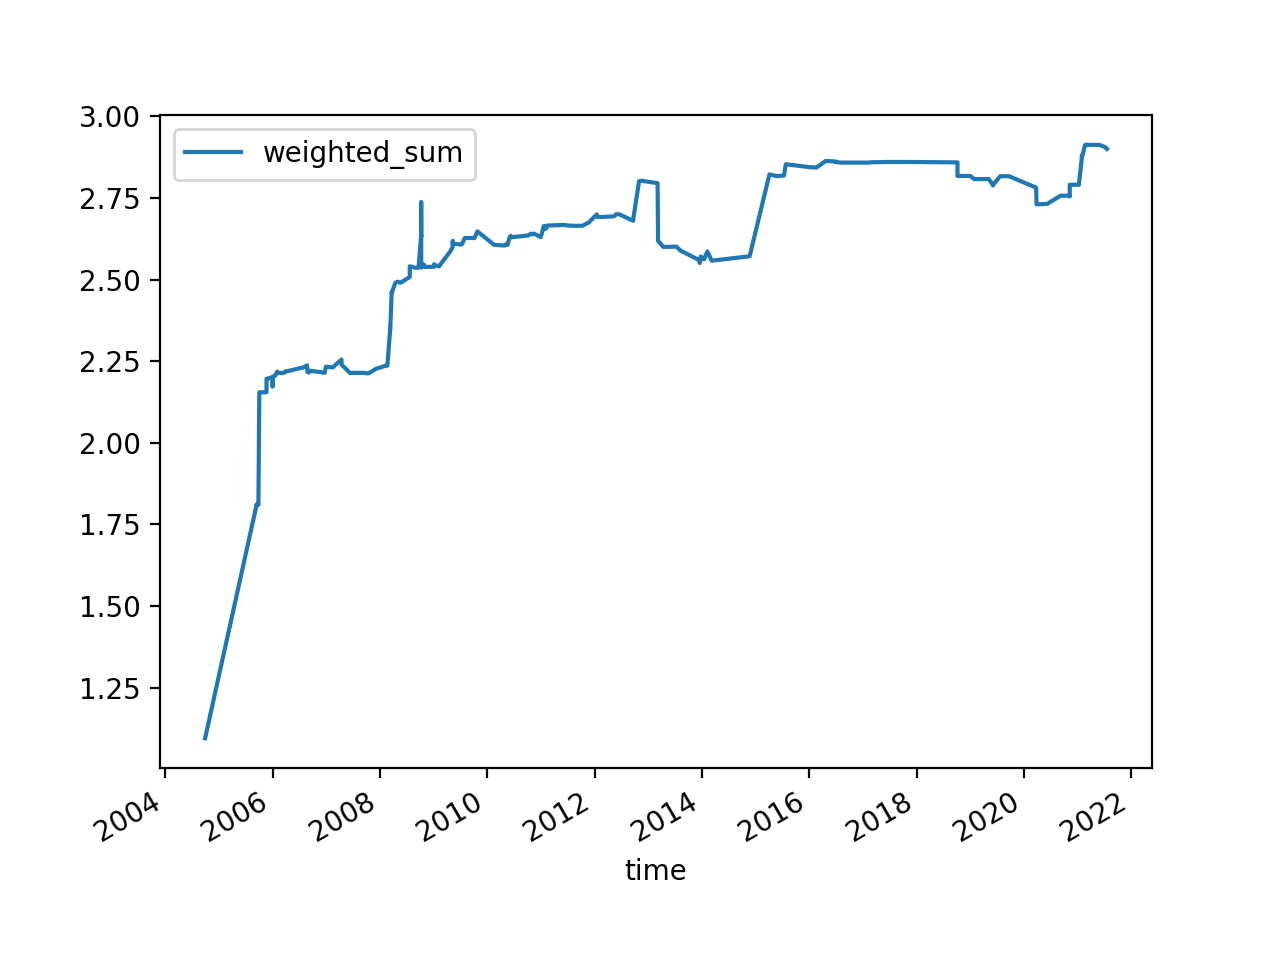

<AxesSubplot:xlabel='time'>

In [32]:
data.plot()

In [ ]:
#for response_doc in session.get(action='query', prop='revisions', titles='Chile', 
#                                    rvprop=['ids', 'timestamp'], rvlimit=100, rvdir="newer", 
#                                    formatversion=2, continuation=True):
#    for rev_doc in response_doc['query']['pages'][0]['revisions']:
#        timestamp = rev_doc['timestamp']
#        print(timestamp)